161725开始计算，定投频率：7日，每次定投：8235.29411764706，定投开始时间：2022-07-04 00:00:00，定投结束时间：2022-08-24 00:00:00
总余额： 59504.25641280218
总定投： 62294.11764705882
总买入： 62294.11764705882
总卖出： 0
总收益： -2789.8612342566403
收益率:  -4.478530782092813 %
总余额： 59504.2564128022
总定投： 62294.11764705884
总买入： 62294.11764705884
总卖出： 0
总收益： -2789.8612342566407
收益率:  -4.478530782092812 %
总余额： 59504.2564128022
总定投： 62294.11764705884
总买入： 62294.11764705884
总卖出： 0
总收益： -2789.8612342566407
收益率:  -4.478530782092812 %


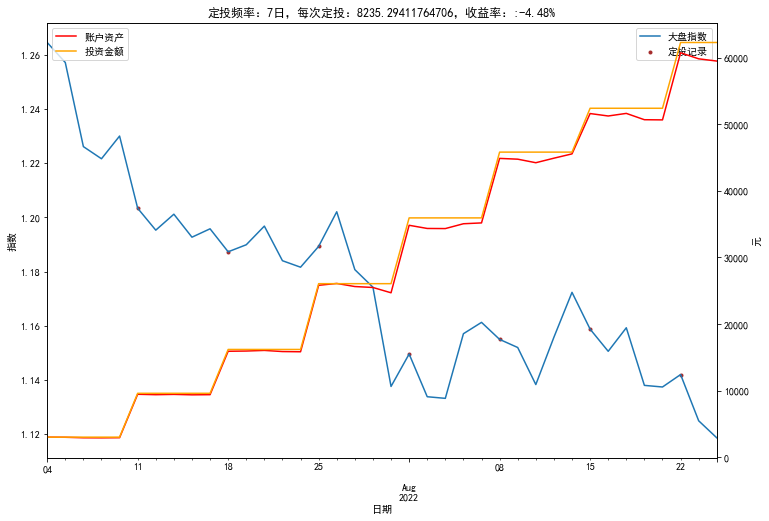

总余额： 21793.301906438202
总定投： 22764.70588235294
总买入： 26058.823529411762
总卖出： 3294.117647058825
总收益： -971.4039759147392
收益率:  -3.727735347754079 %
161725开始计算，定投频率：7日，每次定投：803.0592734225622，定投开始时间：2020-03-18 00:00:00，定投结束时间：2021-08-23 00:00:00
总余额： 1.661762244520105
总定投： -2782.026768642447
总买入： 9424.474187380498
总卖出： 12206.500956022946
总收益： 2783.6885308869673
收益率:  29.536804659238868 %
总余额： 7.216499398055021e-09
总定投： -961.0058315362016
总买入： 5409.177820267687
总卖出： 6370.183651803891
总收益： 961.0058315434181
收益率:  17.766208904107728 %
总余额： 7.216499398055021e-09
总定投： -961.0058315362016
总买入： 5409.177820267687
总卖出： 6370.183651803891
总收益： 961.0058315434181
收益率:  17.766208904107728 %


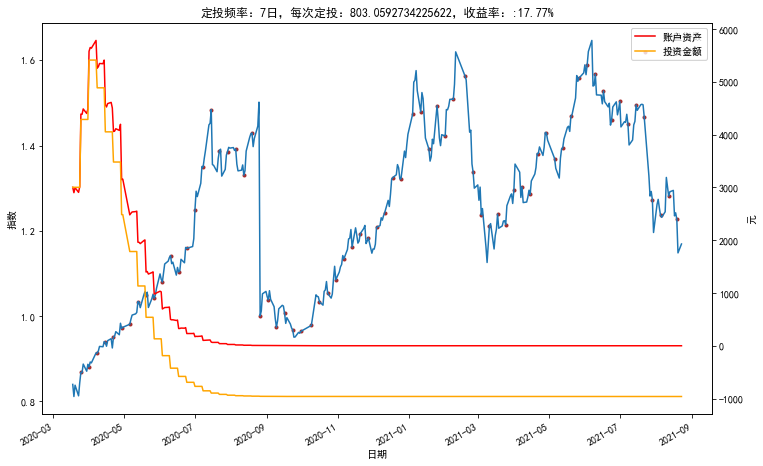

总余额： 9664.755871068975
总定投： 3401.5296367112724
总买入： 14483.747609942639
总卖出： 11082.21797323136
总收益： 6263.226234357703
收益率:  43.24313294480632 %


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
import execjs
import datetime
import time
from FundDataCrawler import FundDataCrawler


warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 8)

def getData(start, end):
    '''
    获取指定时间范围内数据
    '''
    data = fundData.drop(fundData[fundData.index < start].index, axis=0, inplace=False)
    data.drop(data[data.index > end].index, axis=0, inplace=True)
    return data

def getStartTime(df, start):
    while df.index[0] != start:
        start += np.timedelta64(1, 'D')
    return start

def mean_days(df, days, wave):
    '''
     获取n日均线,最近m日振幅
    :param df: 数据集
    :param days: 均线天数
    :params wave:最近m日振幅
    :return average,wavelength:均线、近m日振幅
    '''
    average = []
    wavelength = []
    start = df.head(1).index-np.timedelta64(days+1, "D")
    start = start.astype('str')[0].replace("-", "")  # 转换为字符串

    df4 = getData(start, endDate)
    for i in df.index:
        start_date = i-np.timedelta64(days+1, "D")
        ave = df4[(df4.index > start_date) & (df4.index < i)]['收盘价'].mean()
        average.append(ave)
    ########求振幅#######
    start2 = df.head(1).index-np.timedelta64(wave+1, "D")
    start2 = start2.astype('str')[0].replace("-", "")  # 转换为字符串
    df5 = getData(start2, endDate)

    for i in df.index:
        start_date = i-np.timedelta64(wave+1, "D")
        interval = df5[(df5.index > start_date) & (df5.index < i)]['收盘价']
        length = interval.max()/interval.min()-1  # 最大涨跌幅
        wavelength.append(length)

    return average, wavelength

def stratege1(ml, wl, T_1, lastYield, totalYield):
    '''
    定投策略
    :param ml:均线
    :param wl:振幅
    :param T_1:前1日收盘价
    :param lastYield:上次定投日收益率
    :param totalYield:总收益率
    '''
    bal = 2
    cal = T_1/ml-1  # 大于0,则高于均线

    # 均线、振幅策略
    if (wl > 0.05):
        if (cal >= 0 and cal < 0.1):
            res = 0.5
        elif (cal >= 0.1 and cal < 0.2):
            res = 0
        elif (cal >= 0.2 and cal < 0.3):
            res = -1
        elif (cal >= 0.3 and cal < 0.5):
            res = -3
        elif (cal >= 0.5 and cal < 1):
            res = -5
        elif (cal >= 1):
            res = -10

        elif (cal >= -0.05 and cal < 0):
            res = 0.6
        elif (cal >= -0.1 and cal < -0.05):
            res = 0.9
        elif (cal >= -0.2 and cal < -0.1):
            res = 1.2
        elif (cal >= -0.3 and cal < -0.2):
            res = 1.5
        elif (cal >= -0.4 and cal < -0.3):
            res = 1.8
        elif (cal < -0.4):
            res = 2.1
    else:
        if (cal >= 0 and cal < 0.1):
            res = 0.8
        elif (cal >= 0.1 and cal < 0.2):
            res = 0.5
        elif (cal >= 0.2 and cal < 0.3):
            res = 0
        elif (cal >= 0.3 and cal < 0.5):
            res = -1
        elif (cal >= 0.5 and cal < 1):
            res = -3
        elif (cal >= 1):
            res = -5

        elif (cal >= -0.05 and cal < 0):
            res = 1.2
        elif (cal >= -0.1 and cal < -0.05):
            res = 1.4
        elif (cal >= -0.2 and cal < -0.1):
            res = 1.6
        elif (cal >= -0.3 and cal < -0.2):
            res = 1.8
        elif (cal >= -0.4 and cal < -0.3):
            res = 2.0
        elif (cal < -0.4):
            res = 2.2

    # 上次定投日与这次收益率相差策略
    # 比上次跌的多多买点，涨的多多卖点，做T
    diffYield = totalYield - lastYield
    if res > 0:
        if (diffYield >= -0.05 and diffYield <= 0.05):
            res = res
        elif (diffYield > 0.05 and diffYield < 0.1):
            res = (-res - 0.2) * 0.5
        elif (diffYield >= 0.1 and diffYield < 0.15):
            res = (-res - 0.2) * 1
        elif (diffYield >= 0.15 and diffYield < 0.2):
            res = (-res - 0.2) * 2
        elif (diffYield >= 0.2):
            res = (-res - 0.2) * 3
        elif (diffYield >= -0.1 and diffYield < -0.05):
            res = res + 0.2
        elif (diffYield >= -0.15 and diffYield < -0.1):
            res = res + 0.5
        elif (diffYield >= -0.2 and diffYield < -0.15):
            res = res + 1.0
        elif (diffYield < -0.2):
            res = res + 1.5

    # 总收益率策略
    if (totalYield >= 0.1 and totalYield < 0.15):
        res = (res - 0.5) * bal
    elif (totalYield >= 0.15 and totalYield < 0.2):
        res = (res - 1) * bal
    elif (totalYield >= 0.2 and totalYield < 0.3):
        res = (res - 2) * bal
    elif (totalYield >= 0.3):
        res = (res - 3) * bal
    elif (totalYield >= -0.2 and totalYield < -0.15):
        res = res + 0.5
    elif (totalYield >= -0.3 and totalYield < -0.2):
        res = res + 1
    elif (totalYield < -0.3):
        res = res + 2

    return res

def stratege2(ml, wl, T_1, lastYield, totalYield):
    '''
    定投策略
    :param ml:均线
    :param wl:振幅
    :param T_1:前1日收盘价
    :param lastYield:上次定投日收益率
    :param totalYield:总收益率
    '''
    all = False
    bal = 0.4
    cal = T_1/ml-1  # 大于0,则高于均线

    # 均线、振幅策略
    if (wl > 0.05):
        if (cal >= 0 and cal < 0.1):
            res = 0.5
        elif (cal >= 0.1 and cal < 0.2):
            res = 0
        elif (cal >= 0.2 and cal < 0.3):
            res = -1
        elif (cal >= 0.3 and cal < 0.5):
            res = -3
        elif (cal >= 0.5 and cal < 1):
            res = -5
        elif (cal >= 1):
            res = -10

        elif (cal >= -0.05 and cal < 0):
            res = 0.6
        elif (cal >= -0.1 and cal < -0.05):
            res = 0.9
        elif (cal >= -0.2 and cal < -0.1):
            res = 1.2
        elif (cal >= -0.3 and cal < -0.2):
            res = 1.5
        elif (cal >= -0.4 and cal < -0.3):
            res = 1.8
        elif (cal < -0.4):
            res = 2.1
    else:
        if (cal >= 0 and cal < 0.1):
            res = 0.8
        elif (cal >= 0.1 and cal < 0.2):
            res = 0.5
        elif (cal >= 0.2 and cal < 0.3):
            res = 0
        elif (cal >= 0.3 and cal < 0.5):
            res = -1
        elif (cal >= 0.5 and cal < 1):
            res = -3
        elif (cal >= 1):
            res = -5

        elif (cal >= -0.05 and cal < 0):
            res = 0.8 + bal
        elif (cal >= -0.1 and cal < -0.05):
            res = 1.0 + bal
        elif (cal >= -0.2 and cal < -0.1):
            res = 1.2 + bal
        elif (cal >= -0.3 and cal < -0.2):
            res = 1.4 + bal
        elif (cal >= -0.4 and cal < -0.3):
            res = 1.6 + bal
        elif (cal < -0.4):
            res = 1.8 + bal

    # 上次定投日与这次收益率相差策略
    # 比上次跌的多多买点，涨的多多卖点，做T
    diffYield = totalYield - lastYield
    if res > 0:
        if (diffYield >= -0.05 and diffYield <= 0.05):
            res = res
        elif (diffYield > 0.05 and diffYield < 0.1):
            res = (-res - 0.2) * 0.5
        elif (diffYield >= 0.1 and diffYield < 0.15):
            res = (-res - 0.2) * 1
        elif (diffYield >= 0.15 and diffYield < 0.2):
            res = (-res - 0.2) * 2
        elif (diffYield >= 0.2):
            res = (-res - 0.2) * 3
        elif (diffYield >= -0.1 and diffYield < -0.05):
            res = res + 0.2
        elif (diffYield >= -0.15 and diffYield < -0.1):
            res = res + 0.5
        elif (diffYield >= -0.2 and diffYield < -0.15):
            res = res + 1.0
        elif (diffYield < -0.2):
            res = res + 1.5

    # 总收益率策略
    if (totalYield >= 0.05 and totalYield < 0.5):
        res = 2 * totalYield - (res / 30)
        all = True
    elif (totalYield >= -0.2 and totalYield < -0.15):
        res = res + 0.5
    elif (totalYield >= -0.3 and totalYield < -0.2):
        res = res + 1
    elif (totalYield < -0.3):
        res = res + 2

    return res, all

def stratege3(ml, wl, T_1, lastYield, totalYield):
    '''
    定投策略
    :param ml:均线
    :param wl:振幅
    :param T_1:前1日收盘价
    :param lastYield:上次定投日收益率
    :param totalYield:总收益率
    '''
    all = False
    bal = 0.4
    cal = T_1/ml-1  # 大于0,则高于均线

    # 均线、振幅策略
    if (wl > 0.05):
        if (cal >= 0 and cal < 0.1):
            res = 0.5
        elif (cal >= 0.1 and cal < 0.2):
            res = 0
        elif (cal >= 0.2 and cal < 0.3):
            res = -1
        elif (cal >= 0.3 and cal < 0.5):
            res = -3
        elif (cal >= 0.5 and cal < 1):
            res = -5
        elif (cal >= 1):
            res = -10

        elif (cal >= -0.05 and cal < 0):
            res = 0.6
        elif (cal >= -0.1 and cal < -0.05):
            res = 0.9
        elif (cal >= -0.2 and cal < -0.1):
            res = 1.2
        elif (cal >= -0.3 and cal < -0.2):
            res = 1.5
        elif (cal >= -0.4 and cal < -0.3):
            res = 1.8
        elif (cal < -0.4):
            res = 2.1
    else:
        if (cal >= 0 and cal < 0.1):
            res = 0.8
        elif (cal >= 0.1 and cal < 0.2):
            res = 0.5
        elif (cal >= 0.2 and cal < 0.3):
            res = 0
        elif (cal >= 0.3 and cal < 0.5):
            res = -1
        elif (cal >= 0.5 and cal < 1):
            res = -3
        elif (cal >= 1):
            res = -5

        elif (cal >= -0.05 and cal < 0):
            res = 0.8 + bal
        elif (cal >= -0.1 and cal < -0.05):
            res = 1.0 + bal
        elif (cal >= -0.2 and cal < -0.1):
            res = 1.2 + bal
        elif (cal >= -0.3 and cal < -0.2):
            res = 1.4 + bal
        elif (cal >= -0.4 and cal < -0.3):
            res = 1.6 + bal
        elif (cal < -0.4):
            res = 1.8 + bal

    # 上次定投日与这次收益率相差策略
    # 比上次跌的多多买点，涨的多多卖点，做T
    diffYield = totalYield - lastYield
    if res > 0:
        if (diffYield >= -0.05 and diffYield <= 0.05):
            res = res
        elif (diffYield > 0.05 and diffYield < 0.1):
            res = (-res - 0.2) * 0.5
        elif (diffYield >= 0.1 and diffYield < 0.15):
            res = (-res - 0.2) * 1
        elif (diffYield >= 0.15 and diffYield < 0.2):
            res = (-res - 0.2) * 2
        elif (diffYield >= 0.2):
            res = (-res - 0.2) * 3
        elif (diffYield >= -0.1 and diffYield < -0.05):
            res = res + 0.2
        elif (diffYield >= -0.15 and diffYield < -0.1):
            res = res + 0.5
        elif (diffYield >= -0.2 and diffYield < -0.15):
            res = res + 1.0
        elif (diffYield < -0.2):
            res = res + 1.5

    # 总收益率策略
    if (totalYield >= 0.05 and totalYield < 0.5):
        res = 2 * totalYield - (res / 30)
        all = True
    elif (totalYield >= -0.2 and totalYield < -0.15):
        res = res + 0.5
    elif (totalYield >= -0.3 and totalYield < -0.2):
        res = res + 1
    elif (totalYield < -0.3):
        res = res + 2

    return res, all

def stratege4(ml, wl, T_1):
    '''
    定投策略
    :param ml:均线
    :param wl:振幅
    :param T_1:前1日收盘价
    '''
    cal = T_1/ml-1  # 大于0,则高于均线
    if(cal>=0 and cal<0.15):
        return 0.9
    elif(cal>0.15 and cal<0.5):
        return 0.8
    elif(cal>=0.5 and cal<1):
        return 0.7
    elif(cal>=1):
        return 0.6
    
    elif(wl>0.05):
        
        if(cal>=-0.05 and cal<0):
            return 0.6
        elif(cal>=-0.1 and cal<-0.05):
            return 0.7
        elif(cal>=-0.2 and cal<-0.1):
            return 0.8
        elif(cal>=-0.3 and cal<-0.2):
            return 0.9
        elif(cal>=-0.4 and cal<-0.3):
            return 1.0
        elif(cal<-0.4):
            return 1.1
    else:
        if(cal>=-0.05 and cal<0):
            return 1.8
        elif(cal>=-0.1 and cal<-0.05):
            return 1.9
        elif(cal>=-0.2 and cal<-0.1):
            return 2.0
        elif(cal>=-0.3 and cal<-0.2):
            return 2.1
        elif(cal>=-0.4 and cal<-0.3):
            return 2.2
        elif(cal<-0.4):
            return 2.3

def smart_invest(df, frequence, invest_money, start_time, days, wave, type, init_money):
    '''
     定投计算
    :param df: 数据集
    :param frequence: 定投频率
    :param invest_money: 每次定投金额
    :param start: 定投起始日期
    :param days: 参考均线天数

    :return (amount,invest_log): (收益数据DataFrame，定投记录dict)
    '''
    invest_log = {}  # 每次定投的日期记录(日期:大盘指数)
    invest_rate_log = {} # 每次定投的日期记录(日期:比率)
    invest_day = start_time  # 每次投资的时间
    invest_amount = init_money  # 总投资金额
    buy_amount = init_money # 总买入金额
    sale_amount = 0 # 总卖出金额
    profile = 0  # 总投资收益
    balance = 0  # 账户余额
    lastYield = 0 # 上一次定投收益率

    profile_log = []  # 总收益日志
    invest_amount_log = []  # 账户投资金额日志
    balance_log = []  # 余额日志
    Yield = []  # 收益率日志

    res = mean_days(df, days, wave)
    df["均线"] = res[0]  # 获取均线
    df["振幅"] = res[1]  # 获取振幅
    for date, quote_change, index, ml, wl in zip(df.index, df['涨跌幅'], df['收盘价'], df["均线"], df["振幅"]):

        # 判断是否为定投日
        if date == invest_day:
            if (invest_day == start_time):
                T_1 = start_time
            else:
                formal_day = 1
                while (True):
                    T_1 = date-np.timedelta64(formal_day, "D")  # 前1天的收盘价
                    if (T_1 in df.index.tolist()):
                        break
                    else:
                        formal_day += 1
                T_1 = df[df.index == T_1]["收盘价"][0]

                all = False
                if type == 1:
                    rate = stratege1(ml, wl, T_1, lastYield, profile/buy_amount)
                elif type == 2:
                    rate, all = stratege2(ml, wl, T_1, lastYield, profile/buy_amount)
                elif type == 3:
                    rate, all = stratege3(ml, wl, T_1, lastYield, profile/buy_amount)
                elif type == 4:
                    rate = stratege4(ml, wl, T_1) - 1.1

                lastYield = profile/buy_amount
                if all:
                    rate = rate if rate < 1 else 1
                    # 按照余额止盈
                    sale_amount += balance*rate
                    invest_amount -= balance*rate
                else:
                    if balance + invest_money*rate < 0:
                        rate = 0
                    # 按照定投基准金额定投
                    if rate < 0:
                        sale_amount += -invest_money*rate
                    else:
                        buy_amount += invest_money*rate
                    invest_amount += invest_money*rate
                invest_log[invest_day] = index  # 记录定投当日的指数
                invest_rate_log[invest_day] = rate  # 记录定投当日的投资比率

            # 判断7天后是否为交易日,如果不是则往后加1天直到找到交易日
            invest_day += np.timedelta64(frequence, 'D')
            flag = 0
            while (True):
                if (df[df.index == invest_day].index == invest_day):
                    break
                else:
                    invest_day += np.timedelta64(1, 'D')
                    flag += 1
                    if (flag == 100):
                        break
        
        if date != start_time:
            profile += quote_change*balance  # 计算当天收益
            profile_log.append(profile)

        invest_amount_log.append(invest_amount)
        balance = invest_amount + profile  # 更新账户总资产
        balance_log.append(balance)
        try:
            Yield.append(profile/buy_amount*100)  # 更新收益率
        except:
            Yield.append(0)
    print("总余额：", balance)
    print("总定投：", invest_amount)
    print("总买入：", buy_amount)
    print("总卖出：", sale_amount)
    print("总收益：", profile)
    print("收益率: ", profile/buy_amount*100, "%")

    over = pd.DataFrame({
        "日期": df.index,
        "收益率": Yield,
        "账户资产": balance_log,
        "投资金额": invest_amount_log
    })
    over = over.set_index("日期")
    return over, invest_log, invest_rate_log


def myplot(df1, res, buy, titlename):
    '''
    绘制定投结果图
    '''
    plt.figure()
    df1['收盘价'].plot(label="大盘指数")
    plt.scatter(buy.keys(), buy.values(),
                color="brown", marker=".", label="定投记录")
    plt.legend(loc='best')
    plt.ylabel("指数")
    plt.twinx()

    res['账户资产'].plot(color="red")
    res['投资金额'].plot(color="orange")
    plt.ylabel("元")
    plt.legend()
    plt.title(titlename+":{:.2f}%".format(res.tail(1)["收益率"][0]))
    plt.show()

fundDataCrawler = FundDataCrawler()
total = 30000
frequence = 7
wave = 5
days = 250
balance = 10

# for code in ['161725','320007','014143','003096','400015','011103','002207','008280','011036','012729','001838','005224']:
for code in ['161725']:
    fundData = fundDataCrawler.getFund(code)
    data=pd.read_csv('./investment-plan/train/'+code+'.csv',header=None,dtype=object)
    for cell in data.values.tolist():
        startDate = pd.to_datetime(cell[0])
        endDate = pd.to_datetime(cell[1])

        df3 = getData(startDate, endDate)
        startDate = getStartTime(df3, startDate)

        realDays = (pd.to_datetime(endDate) - startDate).days
        # 每次定投金额
        invest_money = total / (realDays / frequence) *2
        print("{}开始计算，定投频率：{}日，每次定投：{}，定投开始时间：{}，定投结束时间：{}".format(code,frequence,invest_money,startDate,endDate))

        res, buy, money = smart_invest(df3, frequence, invest_money, startDate, days, wave, 1, 3000)
        # print(money)
        # myplot(df3, res, buy, "定投频率：{}日，每次定投：{}，收益率：".format(frequence,invest_money))

        res, buy, money = smart_invest(df3, frequence, invest_money, startDate, days, wave, 2, 3000)
        # print(money)
        # myplot(df3, res, buy, "定投频率：{}日，每次定投：{}，收益率：".format(frequence,invest_money))

        res, buy, money = smart_invest(df3, frequence, invest_money, startDate, days, wave, 3, 3000)
        # print(money)
        myplot(df3, res, buy, "定投频率：{}日，每次定投：{}，收益率：".format(frequence,invest_money))

        res, buy, money = smart_invest(df3, frequence, invest_money, startDate, days, wave, 4, 3000)
        # myplot(df3, res, buy, "定投频率：{}日，每次定投：{}，收益率：".format(frequence,invest_money))

